In [1]:
#Upgrade dependencies
!pip install --upgrade pip
!pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
excel = pd.read_excel("./default of credit card clients.xls")
excel.to_csv("./default of credit card clients.csv", index = None, header = False)
df = pd.read_csv("./default of credit card clients.csv")
df.shape

(30000, 25)

In [4]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,male,graduate school,single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,male,graduate school,single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,female,university,single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,female,others,married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,male,high school,single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [6]:
num_col_1 =["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
num_col_2 =["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
text_col =["SEX","EDUCATION","MARRIAGE"]
label = 'default payment next month'

In [7]:
df[df['AGE']>80]['AGE']

4011     149
4116     126
5395     152
6963     140
7318     228
8940     267
29496    235
Name: AGE, dtype: int64

In [8]:
df[num_col_1].isna().sum()

LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [9]:
df[num_col_2].isna().sum()

PAY_0    0
PAY_2    0
PAY_3    0
PAY_4    0
PAY_5    0
PAY_6    0
dtype: int64

In [10]:
sex = {'male': True, 'female': False}
df['SEX'] = df['SEX'].replace(sex)
df['SEX']= df['SEX'].astype(int)
df['SEX'].head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    0
9    1
Name: SEX, dtype: int64

In [11]:
df['EDUCATION']= df['EDUCATION'].fillna('others')

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[['EDUCATION']]))
df_encoded.columns= encoder.get_feature_names(['EDUCATION'])
df.drop(['EDUCATION'], axis=1, inplace=True)
df_OneHotEncoded = pd.concat([df,df_encoded], axis=1)
df = df_OneHotEncoded
df.head(10)

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_0,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university
0,1,20000,0,married,24,2,2,-1,-1,-2,...,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
1,2,120000,0,single,26,-1,2,0,0,0,...,1000,1000,0,2000,1,0.0,0.0,0.0,0.0,1.0
2,3,90000,0,single,34,0,0,0,0,0,...,1000,1000,1000,5000,0,0.0,0.0,0.0,0.0,1.0
3,4,50000,0,married,37,0,0,0,0,0,...,1200,1100,1069,1000,0,0.0,0.0,0.0,0.0,1.0
4,5,50000,1,married,57,-1,0,-1,0,0,...,10000,9000,689,679,0,0.0,0.0,0.0,0.0,1.0
5,6,50000,1,single,37,0,0,0,0,0,...,657,1000,1000,800,0,0.0,1.0,0.0,0.0,0.0
6,7,500000,1,single,29,0,0,0,0,0,...,38000,20239,13750,13770,0,0.0,1.0,0.0,0.0,0.0
7,8,100000,0,single,23,0,-1,-1,0,0,...,0,581,1687,1542,0,0.0,0.0,0.0,0.0,1.0
8,9,140000,0,married,28,0,0,2,0,0,...,432,1000,1000,1000,0,0.0,0.0,0.0,1.0,0.0
9,10,20000,1,single,35,-2,-2,-2,-2,-1,...,0,13007,1122,0,0,0.0,0.0,1.0,0.0,0.0


In [13]:
df['MARRIAGE'] = df['MARRIAGE'].fillna('married')
marriage = {'married': True, 'single': False}
df['MARRIAGE'].replace(marriage)
df['MARRIAGE'] = df['MARRIAGE'].replace(marriage)
df['MARRIAGE']= df['MARRIAGE'].astype(int)
df['MARRIAGE'].head(10)

0    1
1    0
2    0
3    1
4    1
5    0
6    0
7    0
8    1
9    0
Name: MARRIAGE, dtype: int64

In [14]:
df['AGE']= df['AGE']/80

In [15]:
from sklearn.model_selection import train_test_split

data =['LIMIT_BAL','SEX','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','EDUCATION_graduate school','EDUCATION_high school','EDUCATION_others','EDUCATION_university']
x = df[data]
y=df[label]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle= True, random_state=12)

In [16]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(x_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=[(x_test,y_test)], verbose =True)

[0]	validation_0-auc:0.74965
[1]	validation_0-auc:0.75794
[2]	validation_0-auc:0.76234
[3]	validation_0-auc:0.76669
[4]	validation_0-auc:0.76748
[5]	validation_0-auc:0.76533
[6]	validation_0-auc:0.76711


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[7]	validation_0-auc:0.76989
[8]	validation_0-auc:0.77170
[9]	validation_0-auc:0.77275
[10]	validation_0-auc:0.77390
[11]	validation_0-auc:0.77490
[12]	validation_0-auc:0.77523
[13]	validation_0-auc:0.77429
[14]	validation_0-auc:0.77494
[15]	validation_0-auc:0.77381
[16]	validation_0-auc:0.77316
[17]	validation_0-auc:0.77294
[18]	validation_0-auc:0.77345
[19]	validation_0-auc:0.77338
[20]	validation_0-auc:0.77387
[21]	validation_0-auc:0.77235
[22]	validation_0-auc:0.77227
[23]	validation_0-auc:0.77168
[24]	validation_0-auc:0.77171
[25]	validation_0-auc:0.77204
[26]	validation_0-auc:0.77231
[27]	validation_0-auc:0.77197
[28]	validation_0-auc:0.77197
[29]	validation_0-auc:0.77174
[30]	validation_0-auc:0.77146
[31]	validation_0-auc:0.77095


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

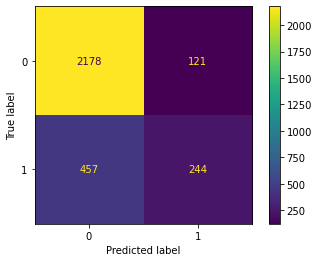

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, x_test, y_test)  
plt.show()  

In [18]:
Accuracy = (2257 + 213) / (2257+413 + 117+213)
Precision = 2257 / (2257 + 413)
Recall = 2257 / (2257 + 117)
F_Measure = (2 * Precision * Recall) / (Precision + Recall)

print("Accuracy: ",Accuracy)
print("Precision: ",Precision)
print("Recall: ",Recall)
print("F_Measure: ",F_Measure)

Accuracy:  0.8233333333333334
Precision:  0.8453183520599251
Recall:  0.9507160909856782
F_Measure:  0.8949246629659
